In [ ]:
import matplotlib.pyplot as plt
import torch

import zuko

_ = torch.random.manual_seed(0)

Unknown instance spec: Please select VM configuration

In [2]:
def log_energy(x):
    return torch.sum(
        -(torch.roll(x, shifts=1, dims=-1) - x)**2/2 
        -x**4, axis=-1)

In [3]:
flow = zuko.flows.MAF(16, transforms=8)

In [4]:
optimizer = torch.optim.Adam(flow.parameters(), lr=1e-3)

for epoch in range(10):
    losses = []

    for _ in range(256):
        x, log_prob = flow().rsample_and_log_prob((1024,))  # faster than rsample + log_prob

        loss = log_prob.mean() - log_energy(x).mean()
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        losses.append(loss.detach())

    losses = torch.stack(losses)

    print(f"({epoch})", losses.mean().item(), "±", losses.std().item())

(0) -2.1604771614074707 ± 10.668582916259766
(1) -4.89676570892334 ± 0.07047239691019058
(2) -5.0729265213012695 ± 0.04605434834957123
(3) -5.153014183044434 ± 0.03635478392243385
(4) -5.1963605880737305 ± 0.03036452829837799
(5) -5.236123085021973 ± 0.028928175568580627
(6) -5.268167018890381 ± 0.022403037175536156
(7) -5.297531604766846 ± 0.023476101458072662
(8) -5.3193278312683105 ± 0.020800888538360596
(9) -5.336478233337402 ± 0.01658797077834606


In [35]:
samples = flow().rsample((2**15,))

In [36]:
(samples**4).mean()

tensor(0.1593, grad_fn=<MeanBackward0>)

In [37]:
def g(s, x):
    return (torch.roll(x, s, -1)*x).mean()

In [38]:
(1 - 2*(g(0, samples) - g(1, samples))) / 2

tensor(0.3102, grad_fn=<DivBackward0>)

In [39]:
x = samples[...,0].detach().cpu().numpy()
x = (x - x.mean())/x.std()

In [40]:
from scipy.stats import norm
import numpy as np

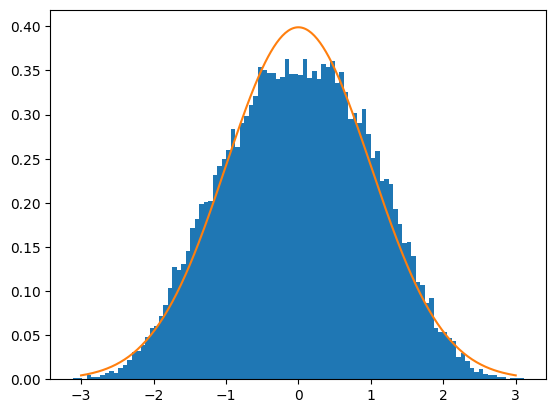

In [41]:
plt.hist(x, density=True, bins=100)
x_ = np.linspace(-3,3,301)
plt.plot(x_, norm.pdf(x_))
plt.show()

In [42]:
samples

tensor([[ 0.5590,  0.0099, -0.7056,  ..., -0.3536, -0.2996,  0.6072],
        [-0.9403, -0.1602, -0.1661,  ...,  0.0689, -0.5210, -0.8412],
        [ 0.1897,  0.0469, -0.1302,  ...,  0.1476,  0.7149, -0.6347],
        ...,
        [-0.4424, -0.1169, -0.3552,  ..., -0.0335,  0.3323, -0.3825],
        [ 1.2703,  0.3263,  0.3537,  ...,  0.6710,  0.3774,  1.0933],
        [ 0.4912, -0.0375, -0.0834,  ...,  0.7986,  0.2564, -0.4693]],
       grad_fn=<DivBackward0>)

In [43]:
x, log_prob = flow().rsample_and_log_prob((2**10,))

In [47]:
log_prob

tensor([ -9.0953,  -9.6316, -10.1025,  ..., -10.4118, -11.2253, -10.2976],
       grad_fn=<SubBackward0>)

In [51]:
t = torch.exp(log_energy(x)-log_prob)

In [54]:
t.mean()**2/(t**2).mean()

tensor(0.7861, grad_fn=<DivBackward0>)